## ERM for separating hyperlanes (realizable case)

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

First, we load the famous IRIS dataset

In [9]:
data = datasets.load_iris()

Next, we print out the IRIS names and feature names

In [27]:
print data.target_names

['setosa' 'versicolor' 'virginica']


In [28]:
for i,name in enumerate(data.feature_names):
    print i, name

0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)


Let's plot petal length vs. petal width

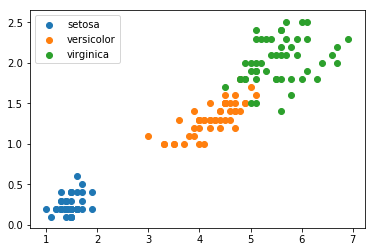

In [48]:
leg = []
for i,t in enumerate(data.target_names):
    x = data.data[np.where(data.target==i)[0],2]
    y = data.data[np.where(data.target==i)[0],3]
    plt.scatter(x,y)
    leg.append(t)
plt.legend(leg)

Ok, so **setosa** is linearly separable from the rest (hence, realizability is given). Let's try to find a separating hyperplane. First, we will scale the data (always a good idea)!

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data.data[:,2:4])

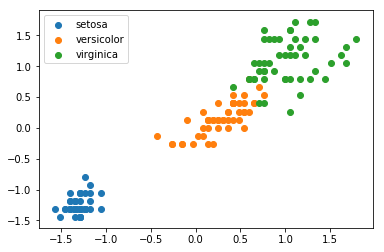

In [56]:
leg = []
for i,t in enumerate(data.target_names):
    x = X[np.where(data.target==i)[0],0]
    y = X[np.where(data.target==i)[0],1]
    plt.scatter(x,y)
    leg.append(t)
plt.legend(leg)

Ok, now we can formulate our **linear program** and solve it.

We start by creating a label vector of {+1,-1} for setosa (+1) vs. the rest (-1).

In [88]:
labels = np.where(data.target == 0, 1 , -1)

Now, we set up the linear program

```
max <u,w> s.t.
Aw >= v (*)
```
Our rows in A will be [x_i 1] which we then need to multiply the the label y_i. This will give us a matrix ```A_ub``` that when multiplied by ```w``` gives the values for the upper-bound inequality costraint (*).

To do this, we multiply the data first (**Step 1**), and then simply add the labels as a separate (last) column (**Step 2**).



In [94]:
# Step 1
A = np.array(labels.reshape(-1,1) * X)

# construct a matrix A_ub, s.t. when multiplied by w gives the 
# values of the upper-bound inequality constraint.
A_ub = np.append(A, labels.reshape(-1,1), 1)

Now, we can setup ```v``` as a vector of all minus ones.

In [96]:
b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)     

Finally, we set u=(1,1,1) and run our LP solver.

In [98]:
u = np.repeat(1, A_ub.shape[1])

from scipy.optimize import linprog
res = linprog(c=u, A_ub=A_ub, b_ub=b_ub, options={"disp": False})
print "Our normal vector is: ", res.x
w = res.x

Our normal vector is:  [ 1.21277875  1.57368128  1.72735632]


Let's plot the hyperplane (or line :)

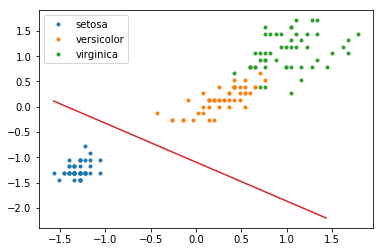

In [116]:
r = np.arange(np.min(X[:,0]), np.max(X[:,1]), 0.5)

def f(x, w):
    return -w[-1]/w[1] - w[0]/w[1] * x

leg = []
for i,t in enumerate(data.target_names):
    x = X[np.where(data.target==i)[0],0]
    y = X[np.where(data.target==i)[0],1]
    plt.plot(x,y,'.')
    leg.append(t)
plt.plot(r, f(r,w))
plt.legend(leg)